In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv


импортируем необходимые библиотеки

In [149]:
from pandas import Series
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, mean_squared_error

In [112]:
#загружаем датасеты
# data = '/kaggle/input/sf-dst-scoring/'
data_train = pd.read_csv('train_bank.csv')
data_test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


как видно из данных, 2 датасета содержат данные с пропусками, и в тестовой, и в тренировочной базе это данные про образование. Рассмотрим их детально

In [9]:
data_train['education'].value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

<AxesSubplot:>

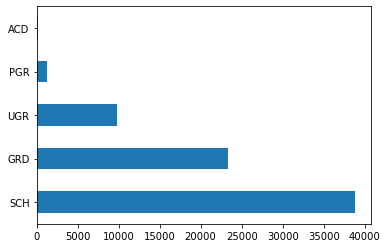

In [10]:
data_train['education'].value_counts().plot.barh()

In [11]:
data_test['education'].value_counts()

SCH    19138
GRD    11403
UGR     4932
PGR      608
ACD       97
Name: education, dtype: int64

<AxesSubplot:>

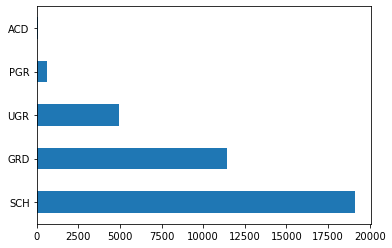

In [12]:
data_test['education'].value_counts().plot.barh()

как видно из графиков, больше всего людей со школьным образованием, что вполне логично - школьное образование, в основном, является обязательным. Соответственно, пропуски в этих данных вполне можем заменить на информацию о том, что люди закончили школу

In [113]:
data_train['education'] = data_train['education'].fillna('SCH')
data_test['education'] = data_test['education'].fillna('SCH')

<AxesSubplot:>

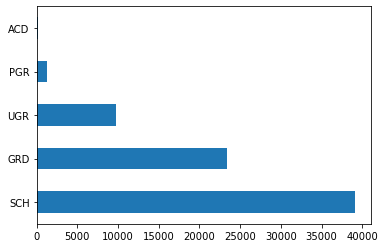

In [14]:
data_train['education'].value_counts().plot.barh()

<AxesSubplot:>

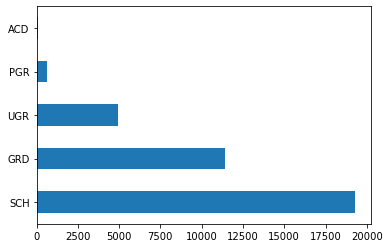

In [15]:
data_test['education'].value_counts().plot.barh()

как видно структура данных особо не изменилась, но зато данные стали более "пригодны" к дальнейшему анализу

In [16]:
data_train.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

In [17]:
data_test.isnull().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
dtype: int64

для дальнейшей обработки информации объединим датасеты с данными в один датасет

In [114]:
data_train['sample'] = 1 # помечаем train
data_test['sample'] = 0 # помечаем test
data_test['default'] = 0 # т.к. значения дефолта отсутствуют для тестовой выборки, то пока заполним нулями

data = data_test.append(data_train, sort=False).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         110148 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [19]:
data.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default
95987,50439,27FEB2014,GRD,F,33,N,N,0,1,-1.371167,1,60,1,2,14000,2,2,N,1,0
83075,106481,25APR2014,SCH,M,54,N,N,1,0,-1.775263,3,50,2,3,29300,4,1,N,1,0
99820,71998,19MAR2014,GRD,M,28,Y,Y,1,0,-1.388749,5,60,2,3,50000,1,3,N,1,1
2788,13549,21JAN2014,SCH,M,30,N,N,0,0,-2.385778,3,70,1,3,32000,2,3,N,0,0
109262,18385,25JAN2014,GRD,F,55,N,N,0,0,-2.564143,4,80,2,3,100000,1,2,N,1,0


все данные датасета можно разбить на несколько видов: бинарные, категориальные и числовые. Для этого разделим колонки в соответствующие списки

In [115]:
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'app_date', 'sna', 'first_time']
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki']

**1.1 Числовые переменные**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'decline_app_cnt'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'bki_request_cnt'}>],
       [<AxesSubplot:title={'center':'score_bki'}>, <AxesSubplot:>]],
      dtype=object)

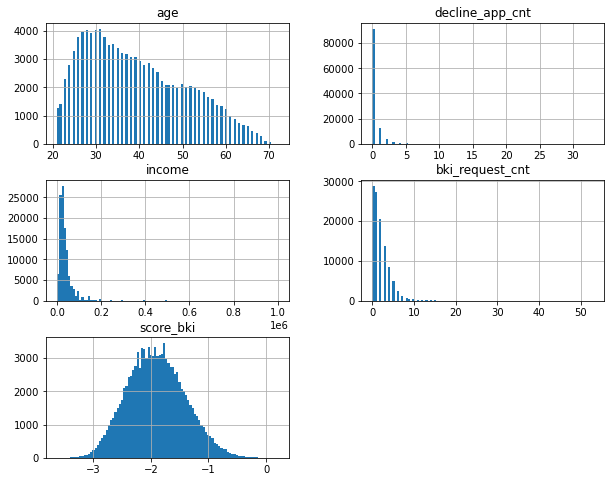

In [21]:
# рассмотрим распределение числовых признаков
data[num_cols].hist(figsize=(10, 8), bins=100)

как видно, почти у всех показателей наблюдается смещение вправо. для того, чтобы распределение было более равномерным, попробуем прологарифировать эти данные

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'decline_app_cnt'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'bki_request_cnt'}>],
       [<AxesSubplot:title={'center':'score_bki'}>, <AxesSubplot:>]],
      dtype=object)

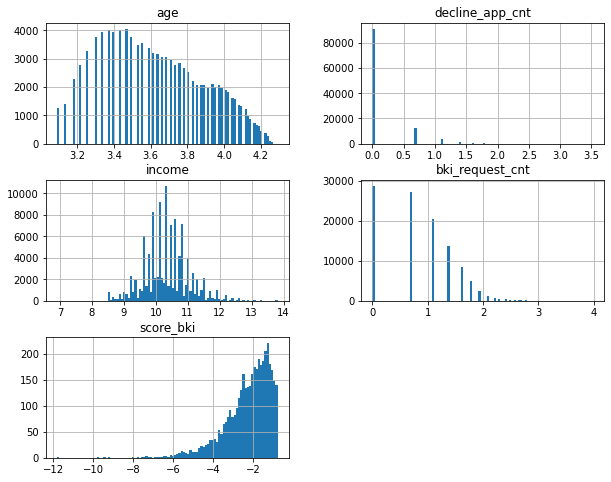

In [52]:
data_log = data.copy()
num_cols_log = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki']
for q in num_cols_log:
    data_log[q] = data_log[q].apply(lambda w: np.log(w + 1))
    
data_log[num_cols_log].hist(figsize=(10, 8), bins=100)

как видно, логарифмирование "помогло" только данным о доходе заемщика, его распределение стало более нормальным, остальные показатели также остались смещенными вправо. 

рассмотрим показатель даты, и извлечем из него данные, которые можно использовать в качестве каких либо признаков

In [116]:
# преобразуем показатель даты в формат месяцев
data['app_date'] = pd.to_datetime(data['app_date'])
data['app_month'] = data['app_date'].dt.month
#добавим эти данные к списку категориальных признаков
cat_cols.append('app_month')
data.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,app_month
32842,86961,2014-04-03,ACD,M,55,Y,Y,0,1,-2.426663,...,60,2,3,100000,1,2,N,0,0,4
45888,19960,2014-01-27,GRD,M,41,Y,N,0,0,-1.984443,...,70,2,2,45000,1,4,N,1,0,1
6211,40341,2014-02-17,GRD,F,32,N,N,0,0,-0.455709,...,50,2,3,32000,1,4,N,0,0,2
101827,45338,2014-02-21,GRD,F,53,N,N,0,1,-1.583533,...,60,2,3,25000,1,4,N,1,0,2
9598,65220,2014-03-14,SCH,M,28,Y,Y,0,0,-1.622508,...,50,1,3,40000,1,3,N,0,0,3


<AxesSubplot:>

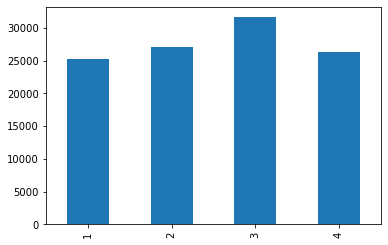

In [117]:
data['app_month'].value_counts().sort_index(ascending=True).plot.bar()

количество заявок на кредиты в марте увеличилось. Если эти данные из банков, которые находятся на территории бывшего СССР, то это вполне объяснимо покупкой подарков к 8 марта :). И этим можно воспользоваться банкам с маркетинговой точки зрения (период запуска рекламы)

теперь проанализируем статистические показатели числовых признаков. Визуально это можно сделать с помощью boxplot

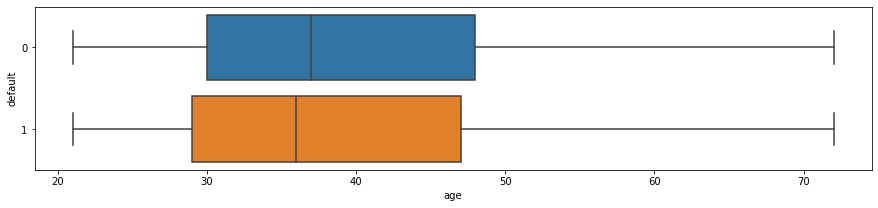

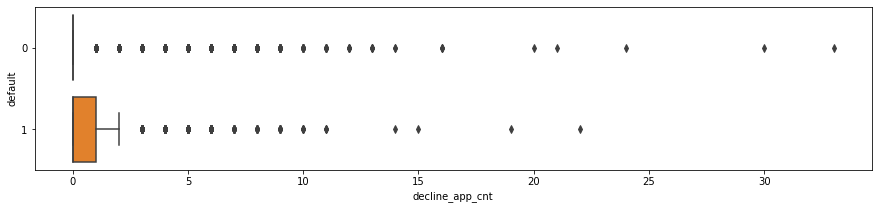

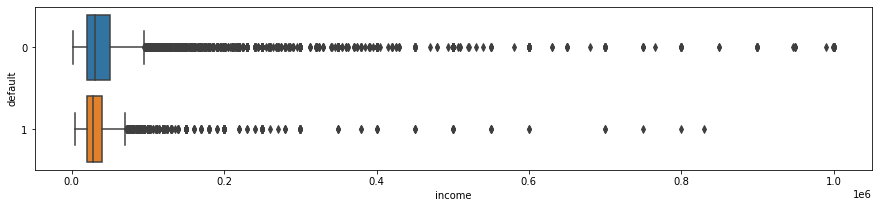

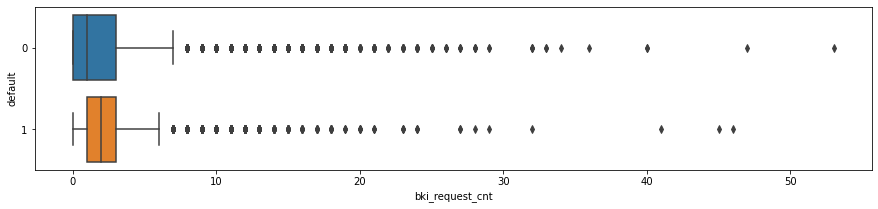

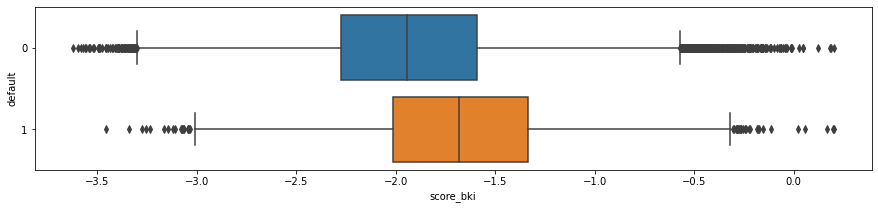

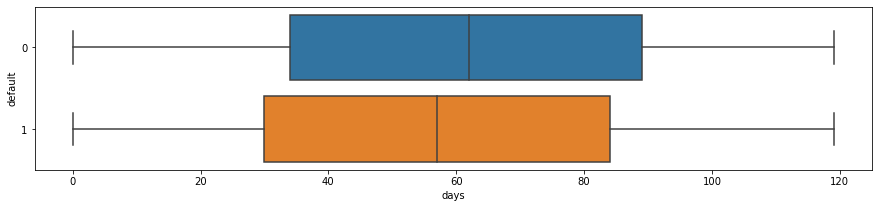

In [68]:
for col in num_cols:
    plt.figure(figsize=(15, 3))
    sns.boxplot(y=data.default, x=data[col], orient='h')

Теперь необходимо проверить датасет на выбросы и удалить их, т.к наличие выбросов существенно ухудшает модель

In [118]:
# выбросы = это данные, которые выходят более, чем на 1,5 межквартильного размаха
def removeIQR(data, col):
    Q3 = np.quantile(data[col], 0.75) # 1й квартиль
    Q1 = np.quantile(data[col], 0.25) # 3й квартиль
    IQR = Q3 - Q1 # межквартильный размах
     
    print("IQR для %s составляет: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x >= lower_range) & (x <= upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    print(col)

for i in num_cols:
    removeIQR(data, i)
data = filtered_data
data.info()

IQR для age составляет: 18.0
age
IQR для decline_app_cnt составляет: 0.0
decline_app_cnt
IQR для income составляет: 28000.0
income
IQR для bki_request_cnt составляет: 3.0
bki_request_cnt
IQR для score_bki составляет: 0.6925455175000004
score_bki
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109630 entries, 0 to 110147
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         109630 non-null  int64         
 1   app_date          109630 non-null  datetime64[ns]
 2   education         109630 non-null  object        
 3   sex               109630 non-null  object        
 4   age               109630 non-null  int64         
 5   car               109630 non-null  object        
 6   car_type          109630 non-null  object        
 7   decline_app_cnt   109630 non-null  int64         
 8   good_work         109630 non-null  int64         
 9   score_bki         109630 non-null

данных много и можно посчитать количество дней, начиная с начала года, когда была подана заявка. Ососбой аналитической информации эти данные не несут, но могут помочь улучшить модель, как числовой признак

In [119]:
data['days'] = (data.app_date - data.app_date.min()).dt.days
#добавим эти данные к списку числовых признаков
num_cols.append('days')
# данные о app_date уберем из датасета и списка
data.drop(['app_date'], axis = 1, inplace = True)
cat_cols.remove('app_date')
print(num_cols, cat_cols)

['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki', 'days'] ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time', 'app_month']


посмотрим, как изменились статистические показатели числовых признаков после удаления выбросов

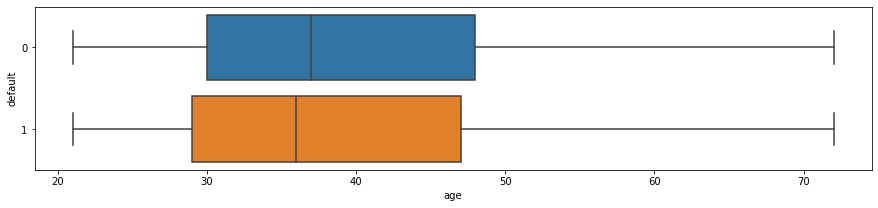

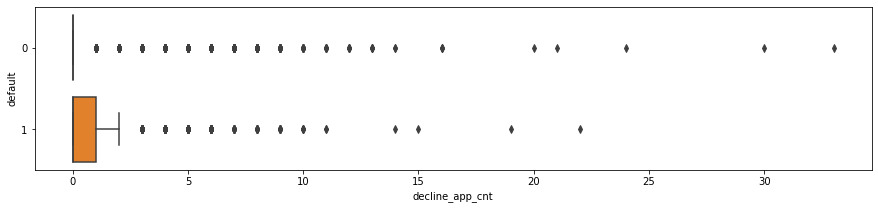

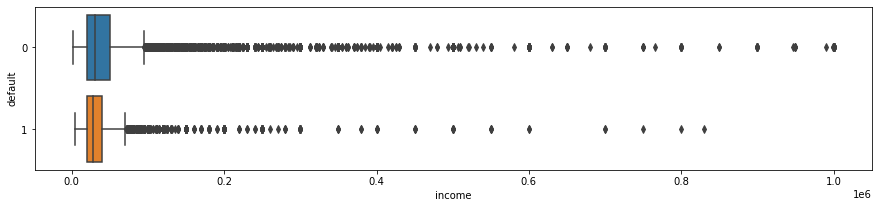

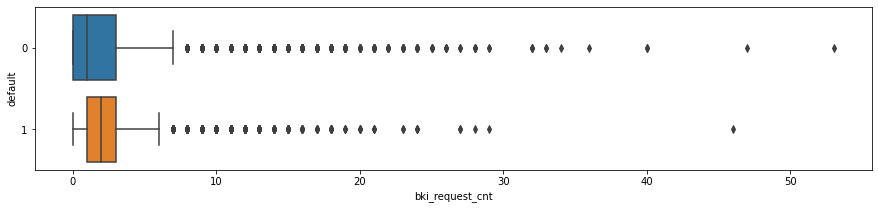

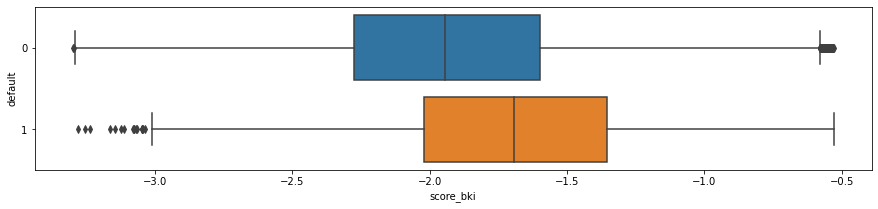

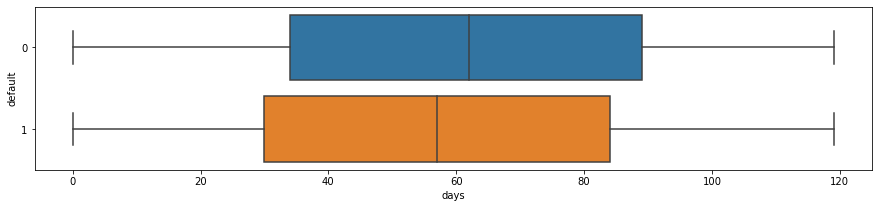

In [120]:
for col in num_cols:
    plt.figure(figsize=(15, 3))
    sns.boxplot(y=data.default, x=data[col], orient='h')

посмотрим, как будут распределены данные после очистки при логарифмировании

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'decline_app_cnt'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'bki_request_cnt'}>],
       [<AxesSubplot:title={'center':'score_bki'}>,
        <AxesSubplot:title={'center':'days'}>]], dtype=object)

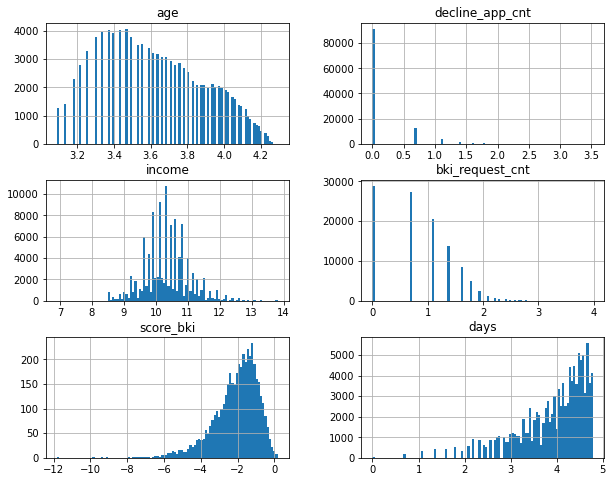

In [87]:
data_log1 = data.copy()
num_cols_log1 = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt', 'score_bki', 'days']
for q in num_cols_log1:
    data_log1[q] = data_log1[q].apply(lambda w: np.log(w + 1))
    
data_log1[num_cols_log1].hist(figsize=(10, 8), bins=100)

особо стоит отметить изменение распределения даных по доходам, даные по возрасту стали более сглаженными, а кредитный рейтинг в БКИ остался смещенным вправо, но при этом основная его масса можно сказать, что распредлена нормально

числовые данные имеют влияние на показатель благонадежности, рассмотрим насколько они коррелируют между собой и на целевой показатель в целом. Для этого построим тепловую карту корреляции 

<AxesSubplot:>

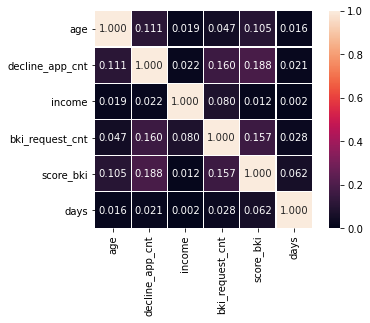

In [88]:
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1, square=True,
              annot=True, fmt=".3f", linewidths=0.1)

возраст, несомненно, напрямую влияет на наши признаки, но также следует заметить, что показатель количества запросов в БКИ и показатель отказов в кредите в прошлом достаточно тесно коррелируют между собой. Следует отметить взаимосвязь между кредитным рейтингом и показателем отказов, а также тем, как часто делали запрос в БКИ

оценим значимость числовых переменных и выведем это в виде графика

<AxesSubplot:>

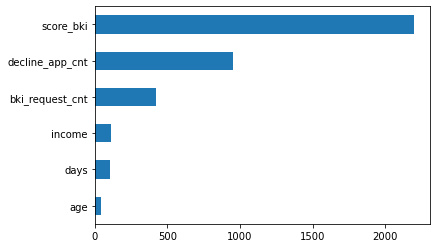

In [89]:
imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

как видно наиболее значимым показателем для оценки благонадежных клиентов является кредитный рейтинг БКИ

**1.2 Бинарные переменные**

Бинарные признаки доступны для машинного обучения только в числовом формате, поэтому их, при необходимости, следует преобразовать

In [121]:
data[bin_cols].sample(5)

,sex,car,car_type,foreign_passport,good_work
44371,M,N,N,N,1
12221,F,Y,N,N,1
49107,M,N,N,N,0
45559,M,N,N,N,0
97018,F,Y,Y,N,0


In [122]:
#для начала проебразуем признак пола. Присвоим женщинам 0, а мужчинам 1
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(data['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [123]:
# с помощью LabelEncoder преобразуем все бинарные переменные в числовые
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data.sample(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,app_month,days
27758,60733,SCH,0,41,0,0,0,0,-2.321621,2,...,1,2,18000,1,4,0,0,0,3,68
79248,81893,UGR,1,51,1,0,0,0,-2.269924,0,...,1,2,15000,1,4,0,1,0,3,88
46315,53852,GRD,0,23,1,1,0,0,-1.810874,0,...,2,3,45000,4,3,0,1,0,3,61
59768,39684,SCH,0,46,0,0,2,1,-1.334758,0,...,1,2,20000,2,3,0,1,1,2,46
9486,56687,SCH,0,59,0,0,0,0,-1.276692,1,...,2,3,12650,1,3,0,0,0,3,63


**1.3 Категориальные признаки**

In [93]:
# рассмотрим, что собой представляют данные о возрасте
data['age'].value_counts()

31    4084
28    4035
30    4035
27    3964
29    3940
26    3780
32    3773
34    3548
33    3499
35    3386
25    3292
36    3228
37    3185
39    3095
38    3070
40    2950
42    2857
41    2804
24    2780
43    2672
44    2536
23    2295
45    2235
50    2104
46    2102
48    2084
47    2074
52    2065
51    2015
53    1980
49    1964
54    1911
55    1837
56    1641
57    1578
22    1415
58    1373
59    1340
21    1262
60    1236
61     975
62     885
63     720
64     663
65     618
66     442
67     382
68     261
69     110
70      60
71       6
72       2
Name: age, dtype: int64

In [124]:
# разделим данные на возрастные категории
def category(x): #присвоим каждому возрастному периоду номер
    if 20 <= x <= 29:
        return 1
    elif 30 <= x <= 39:
        return 2
    elif 40 <= x <= 50:
        return 3
    elif 51 <= x <= 72:
        return 4
        
data['category_age'] = data['age'].apply(category)
data['category_age'].value_counts()

2    34736
1    26644
3    26257
4    21993
Name: category_age, dtype: int64

In [126]:
#и сразу же добавляем новый категориальный признак в список
cat_cols.append('category_age')
cat_cols

['education',
 'region_rating',
 'home_address',
 'work_address',
 'sna',
 'first_time',
 'app_month',
 'category_age',
 'category_age']

рассмотрим образование клиентов

In [128]:
data['education'].value_counts()

SCH    58250
GRD    34570
UGR    14666
PGR     1857
ACD      287
Name: education, dtype: int64

из приведенных выше данных видно, что параметр образования представлен не в числовом формате, что будет помехой в дальнейшей подготовке датасета для анализа. Соответственно, нам необходимо преобразовать этот признак в числовой

In [129]:
def education(x): #присвоим каждому уровню образования номер
    if x == 'SCH':
        return 0 #школа
    elif x == 'GRD':
        return 1 #высшее образование/бакалавр
    elif x == 'UGR':
        return 2 #высшее образование/магистр
    elif x == 'PGR':
        return 3 #ученая степень
    elif x == 'ACD':
        return 4 #академическое образование
data['education'] = data['education'].apply(education)
data['education'].value_counts()

0    58250
1    34570
2    14666
3     1857
4      287
Name: education, dtype: int64

In [130]:
cat_cols

['education',
 'region_rating',
 'home_address',
 'work_address',
 'sna',
 'first_time',
 'app_month',
 'category_age']

теперь можем сопоставить значимость бинарых и категориальных признаков с помощью функции mutual_info_classif из библиотеки sklearn

<AxesSubplot:>

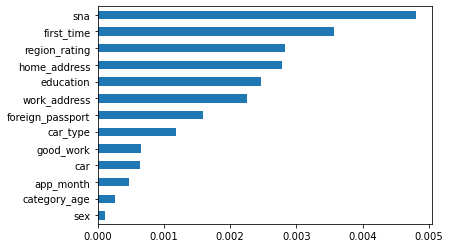

In [131]:
imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'], discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

как видно, наиболее важен оказался признак связи заемщика с клиентами банка, а наименее - пол клиента

для более точного построения модели необходимо преобразовать категориальные показатели в бинарные. Для этого воспользуемся методом One-Hot Encoding, он как и dummy-переменные преобразовывает данные в бинарный формат

In [132]:
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)
X_cat.shape

(109630, 34)

In [133]:
#Стандартизируем числовые переменные
X_num = StandardScaler().fit_transform(data[num_cols].values)
X_num.shape

(109630, 6)

In [134]:
#oбъединим стандартизованные числовые, бинарные и закодированные категориальные переменные
X = np.hstack([X_num, data[bin_cols].values, X_cat])
Y = data['default'] #выделяем целевую переменную

строим логистическую модель

C:\Users\007\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


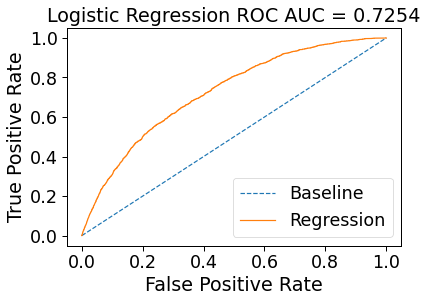

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

Y_pred_prob = model_log_reg.predict_proba(X_test)[:, 1]
y_pred = model_log_reg.predict(X_test)

roc_auc1 = roc_auc_score(y_test, Y_pred_prob)
fpr, tpr, threshold = roc_curve(y_test, Y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.4f' % roc_auc1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [179]:
#выведем основные метрики
print('accuracy_score: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('precision_score: {}'.format(np.round(precision_score(y_test, y_pred), 4)))
print('recall_score: {}'.format(np.round(recall_score(y_test, y_pred), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred), 4)))

accuracy_score: 0.9149
precision_score: 0.3333
recall_score: 0.0021
f1_score: 0.0043


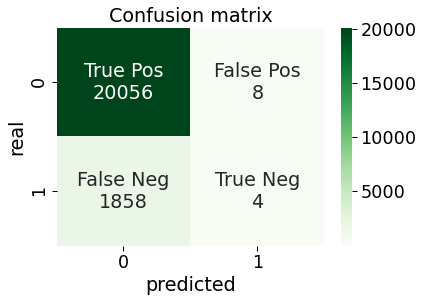

In [137]:
# Визуализация confusion matrix:
sns.set_context(context='paper', font_scale=2, rc=None)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Greens')
ax.set(xlabel='predicted', ylabel='real',title = 'Confusion matrix')
plt.show()


C:\Users\007\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Лучшее Penalty: l1
Лучшее C: 10000.0


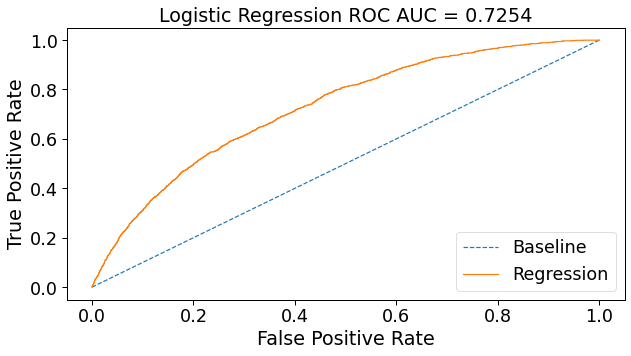

In [145]:

from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 2)
max_iter = [30, 50, 100]

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty, max_iter = max_iter)

model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Y_prob_hp = best_model.predict_proba(X_test)[:, 1]
y_pred_hp = best_model.predict(X_test)

roc_auc2 = roc_auc_score(y_test, Y_prob_hp)
fpr, tpr, threshold = roc_curve(y_test, Y_prob_hp)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
ax.set_title('Logistic Regression ROC AUC = %0.4f'%roc_auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [180]:
#выведем основные метрики
print('accuracy_score: {}'.format(np.round(accuracy_score(y_test, y_pred_hp), 4)))
print('precison_score: {}'.format(np.round(precision_score(y_test, y_pred_hp), 4)))
print('recall_score: {}'.format(np.round(recall_score(y_test, y_pred_hp), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred_hp), 4)))

accuracy_score: 0.6617
precison_score: 0.1519
recall_score: 0.6509
f1_score: 0.2463


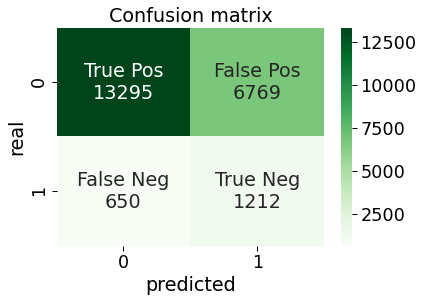

In [142]:
# Визуализация confusion matrix:
sns.set_context(context='paper', font_scale=2, rc=None)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_test, y_pred_hp).flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
ax = sns.heatmap(confusion_matrix(y_test, y_pred_hp), annot=labels, fmt='', cmap='Greens')
ax.set(xlabel='predicted', ylabel='real',title = 'Confusion matrix')
plt.show()


сравнивая  метрики оценки качества моделей в исходной модели и модели с гиперпараметрами, видно, что параметр ROC AUC не изменился, но при этом значительно изменились метрики полноты и точности и их сводная метрика f1, что говорит о благоприятном влиянии использования гиперпараметров при посторении модели. Что касается матрицы ошибок, то здесь показатель TP (когда дефолт классифируется как дефолт) значительно уменьшился, т.е модель более точно предсказывает вероятность того, что кредит окажется невозвратным

попробуем сбалансировать выборку при помощи undersampling

<AxesSubplot:xlabel='default', ylabel='count'>

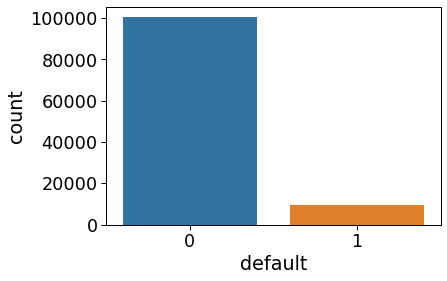

In [175]:
#сделаем эту же выборку сбалансированной с помощью undersampling
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='default', data=data)

In [176]:
data['default'].value_counts()

0    100366
1      9264
Name: default, dtype: int64

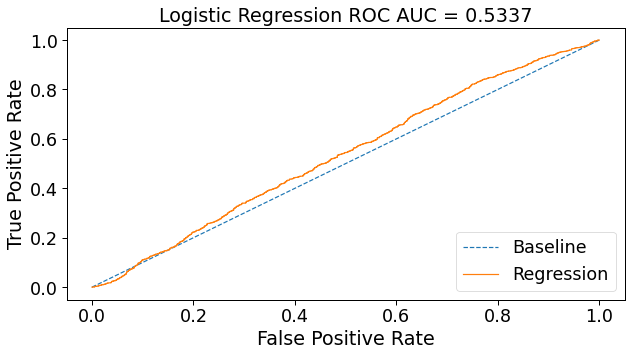

In [174]:
data_bal = data[data.default == 0][:9264].append(data[data.default == 1])
Y_bal = data_bal['default']
X_bal = data_bal.drop('default',axis = 1)
X_train_bal, X_test_bal, Y_train_bal, Y_test_bal = train_test_split(X_bal, Y_bal, test_size=0.20, random_state=42)

clf = LogisticRegression()
bal_model = clf.fit(X_train_bal, Y_train_bal)

Y_prob_bal = bal_model.predict_proba(X_test_bal)[:, 1]
y_pred_bal = bal_model.predict(X_test_bal)

roc_auc3 = roc_auc_score(Y_test_bal, Y_prob_bal)
fpr, tpr, threshold = roc_curve(Y_test_bal, Y_prob_bal)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
ax.set_title('Logistic Regression ROC AUC = %0.4f'%roc_auc3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [182]:
#выведем основные метрики
print('accuracy_score: {}'.format(np.round(accuracy_score(Y_test_bal, clf.predict(X_test_bal)), 4)))
print('precision_score: {}'.format(np.round(precision_score(Y_test_bal, clf.predict(X_test_bal)), 4)))
print('recall_score: {}'.format(np.round(recall_score(Y_test_bal, clf.predict(X_test_bal)), 4)))
print('f1_score: {}'.format(np.round(f1_score(Y_test_bal, clf.predict(X_test_bal)), 4)))

accuracy_score: 0.4984
precision_score: 0.3182
recall_score: 0.0114
f1_score: 0.0221


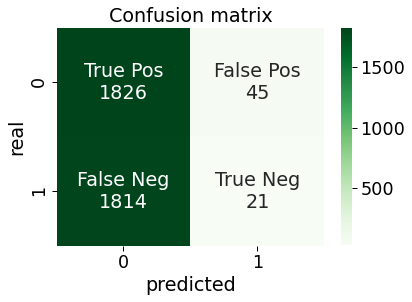

In [170]:
# Визуализация confusion matrix:
sns.set_context(context='paper', font_scale=2, rc=None)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(Y_test_bal, y_pred_bal).flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)
ax = sns.heatmap(confusion_matrix(Y_test_bal, y_pred_bal), annot=labels, fmt='', cmap='Greens')
ax.set(xlabel='predicted', ylabel='real',title = 'Confusion matrix')
plt.show()

результат сбалансирования нашей выборки при помощи undersampling показал, что показатели метрик классификации уменьшились, но при этом confusion matrix показывает результат, исход которого наиболее вероятен